<a href="https://colab.research.google.com/github/AhmedB255/CS989_Big_Data_Project/blob/main/cs989_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

A salary is a certain amount of money paid to an employee after a certain period in return for the work performed by them. Salary is one of the major considerations that a person must have when applying for a new job; does the job pay well? Will I be compensated fairly for the services I will provide?

It is also one of the main reasons why employees choose to leave their current jobs. From their perspective, the employee is not being compensated well enough for the job they're doin compared to others who have the same job or at least similar functions.

For this assignment, we will analyze a dataset full of different salaries from different countries. Our goal is to compare the salaries here in the UK to the salaries of the US and try to implement a model that will accurately predict salaries.

# Exploratory Data Analysis

For this section, we will try to explore the dataset we have as much as possible to gain a better understanding of it.

To achieve this, we will perform the following steps:
*   **Importing the libraries:** We will numpy for mathematical operations, pandas for the actual data analysis, and matplotlib, pyplot, and seaborn to actually plot the results of the analyses. Additionally, we will also tell Jupyter to ignore any warning.
*   **Data Collection:** Here we will simply read the 'salary.csv' file using pandas and store its contents into the *df* variable.
*   **Data Understanding:** We will primarily use pandas to perform some initial analysis aimed at gaining a better understanding of the dataset and if there are any issues that need to be resolved in the 'Data Preprocessing' phase.
*   **Exploratory Visualizations:** Our purpose here is to gain as much understanding of the data as possible and this can be done faster using the proper data visualizations.





**Importing the Libraries**

Let's start by importing the libraries. We will import numpy, pandas, matplotlib, pyplot, and seaborn. We will also tell Jupyter to ignore warnings.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

**Data Collection**

Next, we will import the dataset and store its contents into the *df* variable using pandas.

Link of the dataset: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification/data

In [ ]:
df = pd.read_csv('./data/salary.csv', low_memory=False)

df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Data Understanding**

We have imported the libraries and the dataset successfully. Now, let's start actually understanding the data that we have.

In [ ]:
# Dataset size
print(f'The size of the dataset is {df.size}')

The size of the dataset is 488415


In [ ]:
# Dataset index info
df.index

RangeIndex(start=0, stop=32561, step=1)

In [ ]:
# No of rows and columns
print(f'The salary dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The salary dataset has 32561 rows and 15 columns.


We will use the *info()* method to gain a better understanding of the dataset's columns and their datatypes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Next, let's use the *describe()* method to extract some insights from the dataset's numerical features.

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We need more information about the unique values of the categorical features in the dataset.

In [ ]:
for column in df.select_dtypes(include='object'):
  print(f'The unique values of column {column} are: {df[column].unique()}')

The unique values of column workclass are: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
The unique values of column education are: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
The unique values of column marital-status are: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
The unique values of column occupation are: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
The unique values of column relationship are: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

There are two observations:


1.   There is unecessary whitespace in each of the values for every categorical column.
2.   We can see that the *workclass*, *occupation*, and *native-country* columns contain the ' ?' value.

Let's determine the number of that value in each of the columns to see if the rows containing it can be dropped.

In [ ]:
df['workclass'].loc[df['workclass'] == ' ?'].count()

1836

In [ ]:
df['occupation'].loc[df['occupation'] == ' ?'].count()

1843

In [ ]:
df['native-country'].loc[df['native-country'] == ' ?'].count()

583

Not good. There are too many rows with this value. It will not be possible for us to remove the rows containing this value as it may cause inaccurate analytical results.

Let's check the rows containing the ' ?' values to see if there are any insights to be extracted from them. Let's start with the 'workclass' feature.

In [ ]:
df.loc[df['workclass'] == ' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Interesting. So, whenever there is a *workclass* with the ' ?' value, the *occupation* also gets the ' ?' value. Is it the same with the *occupation* feature?

In [ ]:
df.loc[(df['occupation'] == ' ?') & (df['workclass'] != ' ?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


Good. So, not all values then. In the 'Data Preprocessing' phase, we can replace these specific values of the *occupation* feature with 'None'.

Let's check for any null values.

In [ ]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

It seems the dataset does not have any null values. Let's really make sure of that.

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
df.isnull().any().any()

False

Great. There are no null values in the dataset. Now, let's check if there are any duplicated/redundant rows in the dataset.

In [ ]:
df.duplicated().any()

True

There is. Let's gather more information. How many duplicated rows are there?

In [ ]:
df.duplicated().sum()

24

Can we display the duplicated rows?

In [ ]:
df[df.duplicated() == True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


We will handle the duplication in the 'Data Preprocessing' section. For now, let's try to gain more understanding of the dataset.

We will first start by grouping the dataset by the *occupation*. This will give us the average of the numerical features grouped by the *occupation*.

In [ ]:
df.groupby(['occupation']).mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
occupation,,,,,,
?,40.882800,188658.667390,9.253391,604.491047,60.529571,31.906131
Adm-clerical,36.964456,192043.396286,10.113528,495.954907,60.794430,37.558355
Armed-Forces,30.222222,215425.888889,10.111111,0.000000,209.666667,40.666667
Craft-repair,39.031471,192132.599658,9.110759,649.512808,88.465235,42.304221
Exec-managerial,42.169208,184414.012543,11.449090,2262.772996,138.838416,44.987703
Farming-fishing,41.211268,170190.176056,8.608652,589.726358,63.075453,46.989940
Handlers-cleaners,32.165693,204391.006569,8.510219,257.572993,45.635766,37.947445
Machine-op-inspct,37.715285,195040.877622,8.487512,328.689311,61.706294,40.755744
Other-service,34.949621,188608.452200,8.779666,191.301669,38.250683,34.701669


We can see the different occupations with the different mean values. We can quickly see that the 'Exec-managerial' occupation is the occupation with the highest age value and second-highest capital gain value after the 'Prof-specialty' occupation. However, the most hard-working occupation as per the hours-per-week column is the 'Farming=fishing' occupation.

Let's check which country is the hardest-working.

In [ ]:
df[['native-country', 'hours-per-week']].groupby(['native-country']).mean().sort_values(by='hours-per-week', ascending=False).head(3)

,hours-per-week
native-country,
Thailand,45.444444
France,45.068966
Yugoslavia,44.562500


The above table tells us that Thailand and France are among the hardest-working countries at 45 hours per week on average. Yugoslavia is ignored here as the country does not exist anymore.

Let's check the value counts of the different countries in the dataset.

In [ ]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
(df['native-country'].loc[df['native-country'] == ' United-States'].count() /\
 df['native-country'].count()) * 100

89.5857006848684

The US seems to have the most counts and the highest percentage. This tells us that we are dealing with a highly imbalanced dataset.

The UK in this dataset is divided into England and Scotland. We will combine all records containing Scotland or England as the *native-country* into one unique UK dataset. The same will be done for all records whose *native-country* value is United-States. This will allow us to compare between the two different countries.

In [ ]:
Scotland = df.loc[(df['native-country'] == ' Scotland')]
Scotland.replace(' Scotland', 'United-Kingdom', inplace=True)
England = df.loc[(df['native-country'] == ' England')]
England.replace(' England', 'United-Kingdom', inplace=True)
UK = pd.concat([Scotland, England])
UK

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1586,51,Private,71046,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Male,0,0,45,United-Kingdom,<=50K
5259,18,Private,130389,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,20,United-Kingdom,<=50K
8165,42,Private,185057,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,35,United-Kingdom,<=50K
15039,29,Private,89813,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-Kingdom,<=50K
17176,40,Private,182217,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-Kingdom,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28845,31,Private,272856,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,50,United-Kingdom,<=50K
29442,21,Private,200089,1st-4th,2,Married-civ-spouse,Other-service,Other-relative,White,Male,0,0,40,United-Kingdom,<=50K
30279,29,Private,375482,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-Kingdom,<=50K
31338,46,Private,149640,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,45,United-Kingdom,>50K


In [ ]:
US = df.loc[df['native-country'] == ' United-States']
US

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Good. Bear in mind that while the US dataset has 29170 rows in it, the UK dataset only has 102 rows in it. Thanks to this, the results of analysis between the two datasets might not be fully accurate.

So far, we have looked at some of the properties of the dataset as a whole. We will now use some of the features of the UK and US datasets to compare between them.

Let's look at the average age of individuals for both the UK and US datasets.

In [ ]:
UK['age'].mean()

41.068627450980394

In [ ]:
US['age'].mean()

38.65567363729859

The average ages of US individuals are less than the average of UK individuals.

Let's look at the most common education levels of both countries.

In [ ]:
UK['education'].mode()

0     HS-grad
Name: education, dtype: object

In [ ]:
US['education'].mode()

0     HS-grad
Name: education, dtype: object

The education level is not of much help here. The most common education levels in both countries is being a high school graduate.

Let's find out the most common workclass and occupation for both datasets.

In [ ]:
print('The most common workclass for UK individuals is', UK['workclass'].mode().str.strip().iloc[0])
print('The most common occupation for UK individuals is', UK['occupation'].mode().str.strip().iloc[0])

The most common workclass for UK individuals is Private
The most common occupation for UK individuals is Exec-managerial


In [ ]:
print('The most common workclass for US individuals is', US['workclass'].mode().str.strip().iloc[0])
print('The most common occupation for US individuals is', US['occupation'].mode().str.strip().iloc[0])

The most common workclass for US individuals is Private
The most common occupation for US individuals is Exec-managerial


So, individuals in both countries work for the private sector. However, the most common occupation for UK individuals is being a manager or an executive whilst the most common occupation in the US being a professional with a certain specialty. To reiterate, we cannot say that this is fully accurate information considering the difference in counts between the datasets.

We have extracted some useful insights from our initial analyses. However, we need to take things further and begin using visualization to gain a more intuitive understanding of the data.

**Exploratory Visualization**

Let's start by understanding the different correlations between the columns. We'll use seaborn to display the correlation matrix.

<Axes: >

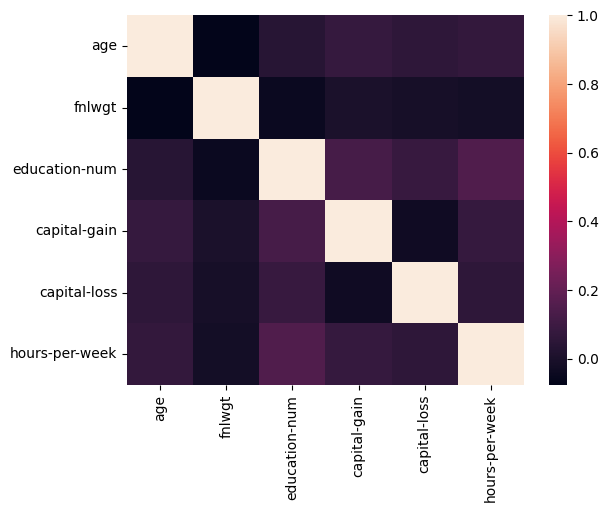

In [ ]:
corr = df.corr()
sns.heatmap(corr)

There isn't really a strong correlation between any of the features. Let's use other visualizations to gain a better idea of the dataset.

We'll conduct quartile analysis on the numerical features of the dataset to try and determine if there are any outliers.

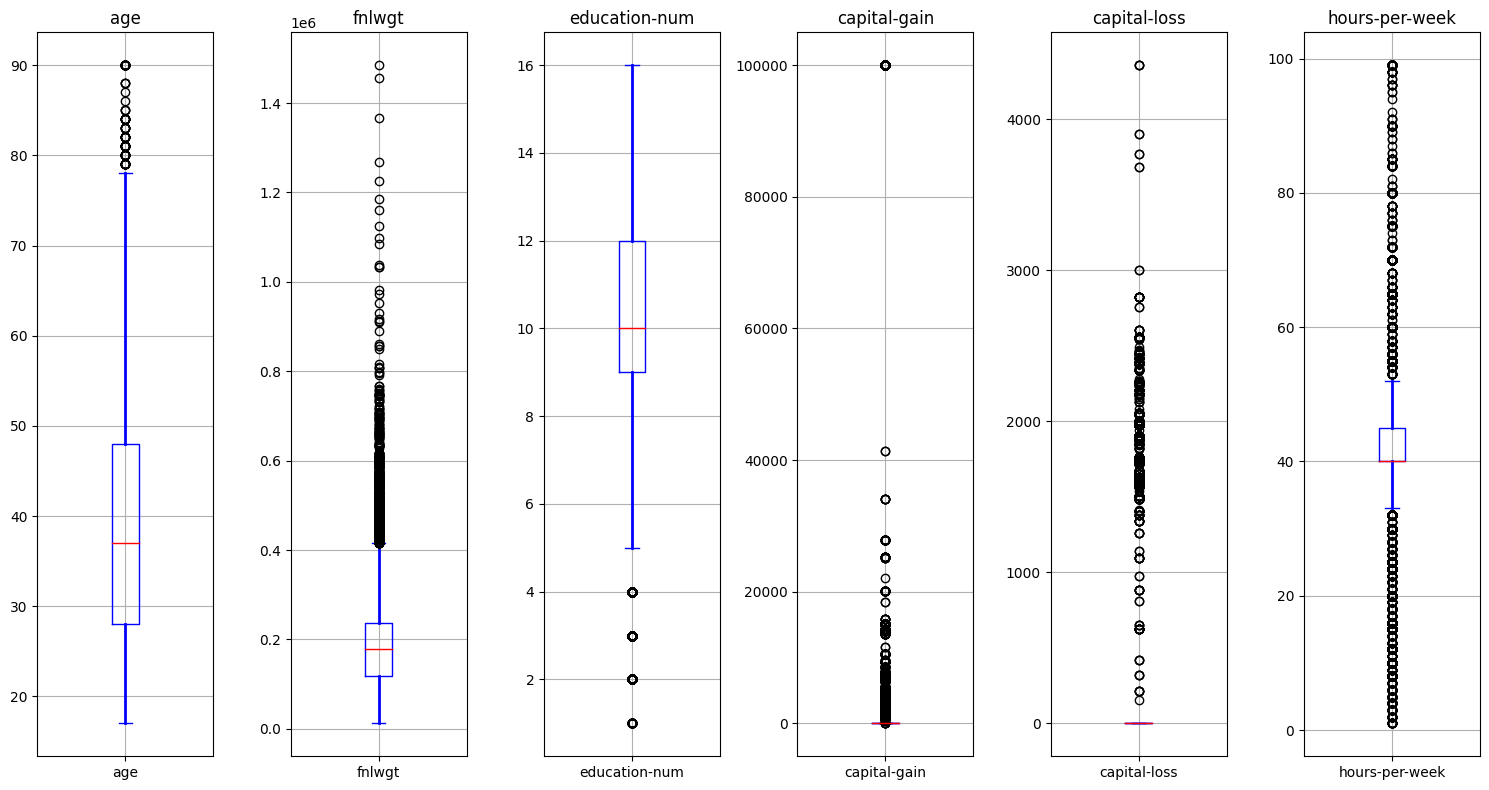

In [ ]:
numeric_columns = df.select_dtypes(include=[int, float]).columns


fig, ax = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 8))

color= dict(boxes= 'blue', whiskers='blue', medians='red', caps='blue')

for i, col in enumerate(numeric_columns):
    df[[col]].plot.box(color=color, ax=ax[i], grid=True,whiskerprops= dict(linestyle='-', linewidth=2.0, color='blue'))
    ax[i].set_title(col)

plt.tight_layout()
plt.show()


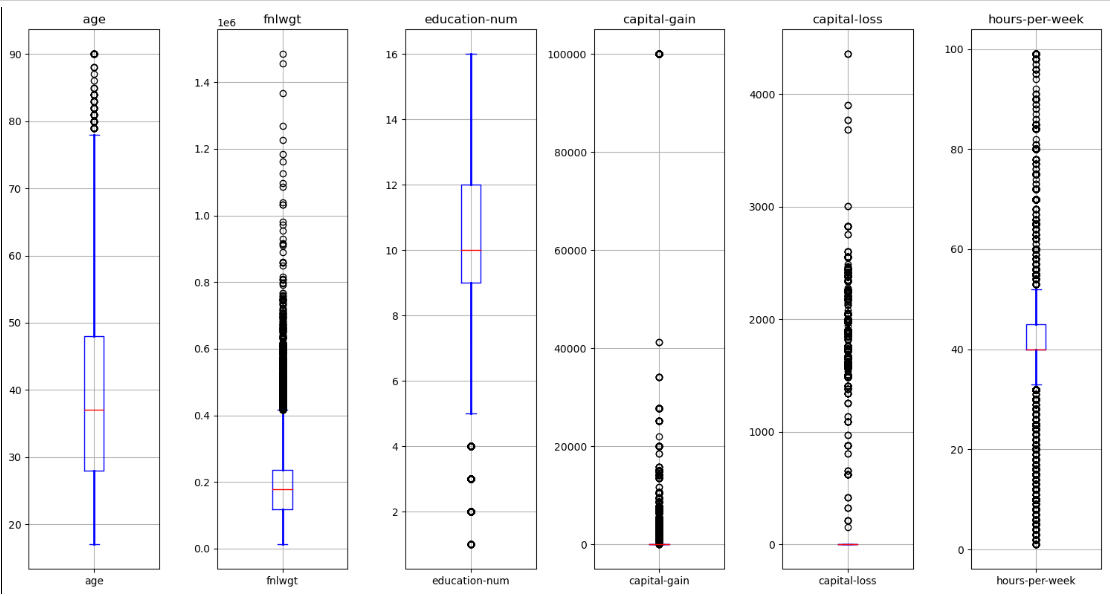

There are many outliers in the numerical features of the dataset. It would not make sense to deal with them as they are too many.

Let's look at the age and salary ranges of UK individuals and compare them to the age and salary ranges of US individuals.

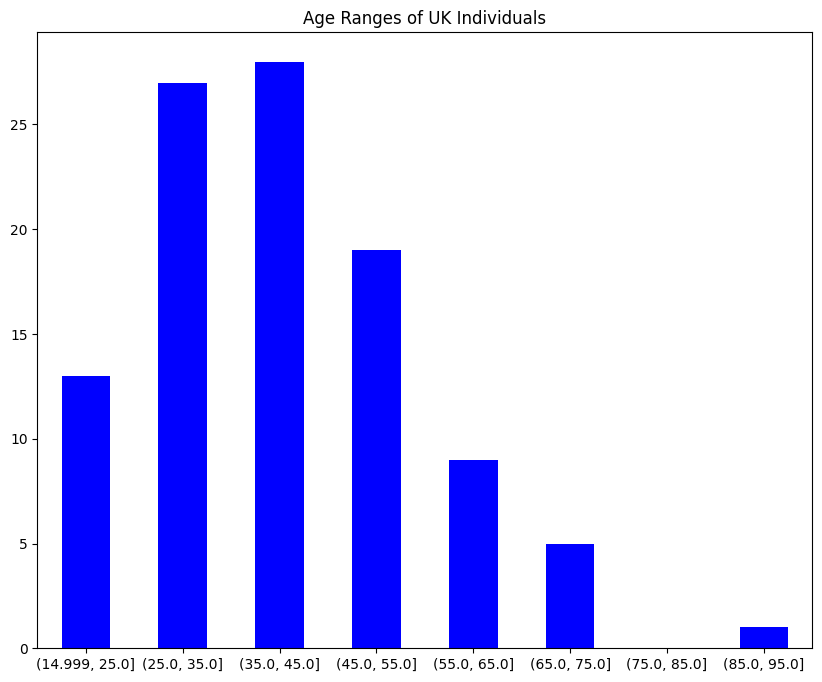

In [ ]:
plt.title('Age Ranges of UK Individuals')
out = pd.cut(UK['age'], bins=[15, 25, 35, 45, 55, 65, 75, 85, 95], include_lowest=True)
out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,8))
plt.show()

The age range with the most values is the 35-45 age range. However, this information should be taken with a grain of salt considering that there are not many UK individuals in the dataset.

Let's look at the salary range of UK individuals.

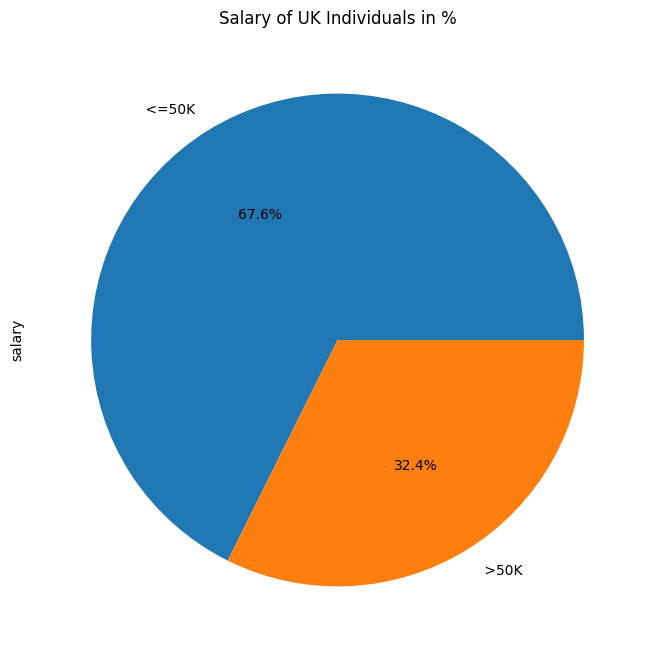

In [ ]:
plt.title('Salary of UK Individuals in %')
UK['salary'].value_counts().plot(kind='pie', figsize=(8, 8), legend=None, autopct='%1.1f%%')
plt.show()

More than 67% of UK individuals earn less than 50K. This makes sense considering that most jobs being advertised are in the 20K to 45K range. However, the dataset makes no mention of the currency of the salary. So, we cannot consider this insight to be 100% accurate.

Let's compare the data that we have with the data of US individuals.

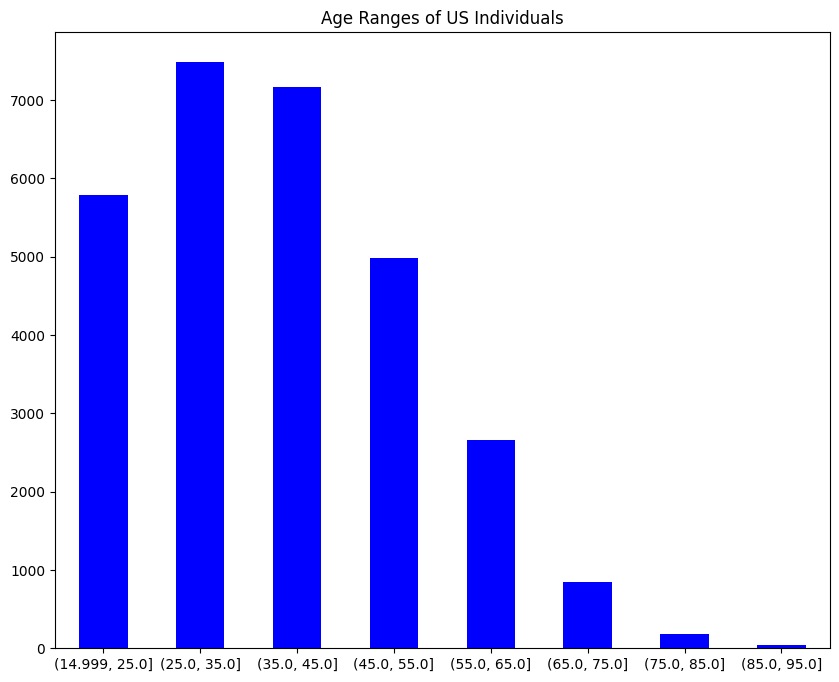

In [ ]:
plt.title('Age Ranges of US Individuals')
out = pd.cut(US['age'], bins=[15, 25, 35, 45, 55, 65, 75, 85, 95], include_lowest=True)
out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,8))
plt.show()

Compared to the UK, it seems that most US individuals in the dataset are in the 25-35 age range, meaning that US individuals are at most a decade younger than their UK counterparts. This lines well with the previous discovery that the average ages of US individuals is less than that of UK individuals.

Let's compare the salaries to get a better picture.

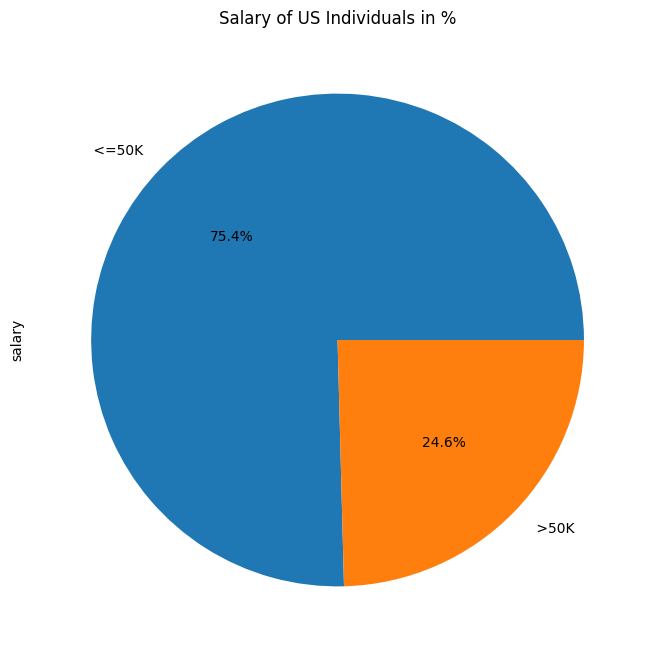

In [ ]:
plt.title('Salary of US Individuals in %')
US['salary'].value_counts().plot(kind='pie', figsize=(8, 8), legend=None, autopct='%1.1f%%')
plt.show()

More than 75% of US individuals have a salary less than 50K. This also makes sense considering that the US workforce has younger people working as part of it, so they are not expected to have high-paying jobs. Again, no specific currency has been mentioned for this dataset so some insights will remain ambiguous.

# Data Preprocessing

We have gathered the following observations by examining the dataset in the EDA phase:
*   There are duplicated values in the dataset.
*   There is unnecessary whitespace in the values of the categorical features of the dataset.
*   The value ' ?' should definitely be replaced by another value.

We will now handle these issues before proceeding to the modelling phase. It is necessary to perform this activity to mitigate any risk of bias when it comes to the analysis results.



**Data Duplication Issue**

Considering the fact that there is a low number of records that are duplicated, we can safely delete these records as they will only impact the modelling phase in a negative way.

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

**Whitespace Issue**

For this, we will the below simple line of code to remove the unecessary whitespace from all categorical features.

In [ ]:
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

for column in df.select_dtypes('object'):
  print(f'The {column} has unique values: {df[column].unique()}')

The workclass has unique values: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
The education has unique values: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
The marital-status has unique values: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
The occupation has unique values: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
The relationship has unique values: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
The race has unique values: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
The sex

**Replacing the '?' Value**

We'll start by replace by replacing the '?' value in the *occupation* field with 'None' when the *workclass* field has a 'Never-worked' value.

In [ ]:
df.loc[df['workclass'] == 'Never-worked', 'occupation'] = 'None'
df.loc[df['workclass'] == 'Never-worked']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
5361,18,Never-worked,206359,10th,6,Never-married,None,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,None,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,None,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,None,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,None,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,None,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,None,Own-child,White,Male,0,0,4,United-States,<=50K


Let's make sure that the number of '?' values in the *workclass* feature matches the one in the *occupation* feature.

Also, let's check the number of '?' in the *native-country* feature.

In [ ]:
df['workclass'].loc[df['workclass'] == '?'].count()

1836

In [ ]:
df['occupation'].loc[df['occupation'] == '?'].count()

1836

In [ ]:
df['native-country'].loc[df['native-country'] == '?'].count()

582

In [ ]:
df.loc[df['workclass'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
df.loc[df['native-country'] == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


To solve this issue, we will replace the value of '?' in the *workclass* column with 'Unknown-work-class', in the *occupation* column with 'Unknown-occupation', and in the *native-country* column with 'Unknown-country'.

Labelling our data this way will be helpful when we apply a machine learning algorithm on the dataset, particularly when it is a supervised machine learning algorithm.

In [ ]:
df.loc[df['workclass'] == '?', 'workclass'] = 'Unknown-work-class'
df.loc[df['occupation'] == '?', 'occupation'] = 'Unknown-occupation'
df.loc[df['native-country'] == '?', 'native-country'] = 'Unknown-country'

In [ ]:
df.loc[df['workclass'] == 'Unknown-work-class']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,Unknown-work-class,180211,Some-college,10,Married-civ-spouse,Unknown-occupation,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,Unknown-work-class,293936,7th-8th,4,Married-spouse-absent,Unknown-occupation,Not-in-family,White,Male,0,0,40,Unknown-country,<=50K
69,25,Unknown-work-class,200681,Some-college,10,Never-married,Unknown-occupation,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,Unknown-work-class,212759,10th,6,Married-civ-spouse,Unknown-occupation,Husband,White,Male,0,0,2,United-States,<=50K
106,17,Unknown-work-class,304873,10th,6,Never-married,Unknown-occupation,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,Unknown-work-class,320084,Bachelors,13,Married-civ-spouse,Unknown-occupation,Wife,White,Female,0,0,55,United-States,>50K
32531,30,Unknown-work-class,33811,Bachelors,13,Never-married,Unknown-occupation,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,Unknown-work-class,287372,Doctorate,16,Married-civ-spouse,Unknown-occupation,Husband,White,Male,0,0,10,United-States,>50K
32541,41,Unknown-work-class,202822,HS-grad,9,Separated,Unknown-occupation,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
df.loc[df['occupation'] == 'Unknown-occupation']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,Unknown-work-class,180211,Some-college,10,Married-civ-spouse,Unknown-occupation,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,Unknown-work-class,293936,7th-8th,4,Married-spouse-absent,Unknown-occupation,Not-in-family,White,Male,0,0,40,Unknown-country,<=50K
69,25,Unknown-work-class,200681,Some-college,10,Never-married,Unknown-occupation,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,Unknown-work-class,212759,10th,6,Married-civ-spouse,Unknown-occupation,Husband,White,Male,0,0,2,United-States,<=50K
106,17,Unknown-work-class,304873,10th,6,Never-married,Unknown-occupation,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,Unknown-work-class,320084,Bachelors,13,Married-civ-spouse,Unknown-occupation,Wife,White,Female,0,0,55,United-States,>50K
32531,30,Unknown-work-class,33811,Bachelors,13,Never-married,Unknown-occupation,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,Unknown-work-class,287372,Doctorate,16,Married-civ-spouse,Unknown-occupation,Husband,White,Male,0,0,10,United-States,>50K
32541,41,Unknown-work-class,202822,HS-grad,9,Separated,Unknown-occupation,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
df.loc[df['native-country'] == 'Unknown-country']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown-country,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,Unknown-country,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,Unknown-country,<=50K
61,32,Unknown-work-class,293936,7th-8th,4,Married-spouse-absent,Unknown-occupation,Not-in-family,White,Male,0,0,40,Unknown-country,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,Unknown-country,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,Unknown-country,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,Unknown-country,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,Unknown-country,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,Unknown-country,>50K


Now that the preprocessing of data is finished, we will proceed to one of the most important parts; actually applying a machine learning algorithm, supervised and unsupervised, on the dataset to create a model that can be used to predict salaries.

# Data Modelling

For this section, we will apply one supervised and one unsupervised machine learning algorithm on the dataset.

To achieve this, we will go through the below steps:
*   **Importing scikit-learn for Machine Learning:** We will import all the necessary libraries required to split the dataset, create a supervised machine learning model, create an unsupervised machine learning model, and test the models' accuracy.
*   **Splitting the Dataset:** Here we will split the dataset into a training set, which will be used to train the model, and a testing set, which will be used to test the accuracy of the model.
*   **Fitting the Supervised Model to the Training Dataset:** We'll begin by using the supervised approach first.
*   **Fitting the Unsupervised Model to the Training Dataset:** Next, we apply the unsupervised approach for machine learning.
*   **Testing the Accuracy of Both Models:** Finally, we test the accuracy of both models using the appropriate testing methods.





**Importing scikit-learn for Machine Learning**

We will import the libraries necessary to apply both the supervised and unsupervised approaches.

For the supervised approach, we will use the Decision Trees algorithm as it is considered one of the most accurate classification algorithms.

For the unsupervised approach, we will employ the K-Means clustering algorithm as it is the most widely used centroid-based algorithm in unsupervised machine learning.

In [ ]:
# For The Supervised Approach
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# For The Unsupervised Approach
from sklearn.cluster import KMeans

**Splitting the Dataset**

To split the dataset, we need a target variable. Fortunately, we have the *salary* feature, which will serve as our target variable.

However, before we use this feature, we need to encode its values to other values that will be understood by the algorithm. In fact, we need to encode *all* categorical features. To do that, we will scikit-learn's *LabelEncoder*.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.select_dtypes('object'):
  df[column] = label_encoder.fit_transform(df[column])

We will split the dataset into a training set and a testing set with 70:30 ratio. This will improve our chances of creating a more accurate model.

In [ ]:
# The training set
train_df = df.loc[:, df.columns != 'salary']
train_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,10,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,13,5,4,0,0,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [ ]:
test_df = df['salary']
test_df

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32537, dtype: int64

In [ ]:
# The actual split
X_train, X_test, y_train, y_test = train_test_split(train_df, test_df, test_size=0.30)

**Fitting the Supervised Model to the Training Dataset**

Now that we've split the dataset, we will proceed and apply the Decision Tree algorithm on the training set and testing the model's accuracy using the testing set.

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predicted = decision_tree.predict(X_test)

**Fitting the Unsupervised Model to the Training Dataset**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)
df_2f = pca.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit_predict(df_2f)
cluster_predicted = kmeans.predict(df_2f)
kmeans.labels_

array([2, 2, 0, ..., 0, 0, 0], dtype=int32)

**Testing the Accuracy of Both Models**

We'll first test the accuracy of the supervised approach, then the accuracy of the unsupervised approach.

For the unsupervised approach, we will employ the confusion matrix and the classification report as methods that will be used to assess the accuracy of the supervised learning model.

We will start by importing the two metrics and then applying them.

In [ ]:
# For The Supervised Approach
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

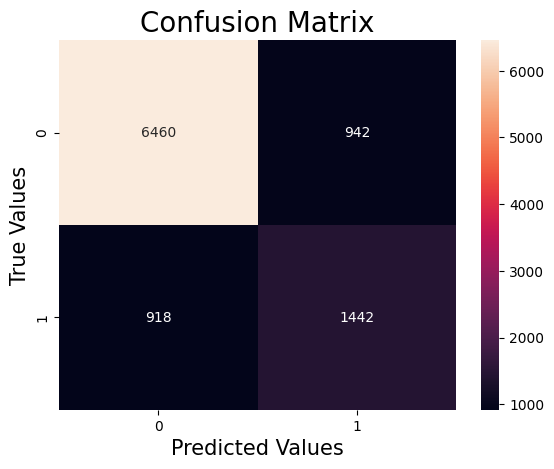

In [ ]:
confusionMatrix = confusion_matrix(y_test, predicted)
ax = sns.heatmap(confusionMatrix, annot=True, fmt='.0f')
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7402
           1       0.60      0.61      0.61      2360

    accuracy                           0.81      9762
   macro avg       0.74      0.74      0.74      9762
weighted avg       0.81      0.81      0.81      9762



As per the above, the decision tree generally has a good accuracy percentage, it is nevertheless far from perfect. Ideally, the supervised machine learning algorithm should have an accuracy bigger than or equal to 95%.

Next, we will proceed with testing the unsupervised algorithm. We will use 4 methods:

*   The Silhouette Score.
*   The Calinski-Harabasz Score.
*   The Completeness Score.
*   The Homogeneity Score.

Finally, we will draw a scatterplot of the data. Hopefully, we will be able to see the different clusters after that.

In [ ]:
# For the Unsupervised Approach
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score

In [ ]:
print("Silhouette Score:", silhouette_score(df, kmeans.labels_))
print("CH Score:", calinski_harabasz_score(df, kmeans.labels_))
print("Completeness Score:", completeness_score(df['salary'], kmeans.labels_))
print("Homogeneity Score:", homogeneity_score(df['salary'], kmeans.labels_))

Silhouette Score: 0.5524327141124625
CH Score: 56274.04137876429
Completeness Score: 2.079919514936429e-05
Homogeneity Score: 3.768759416506456e-05


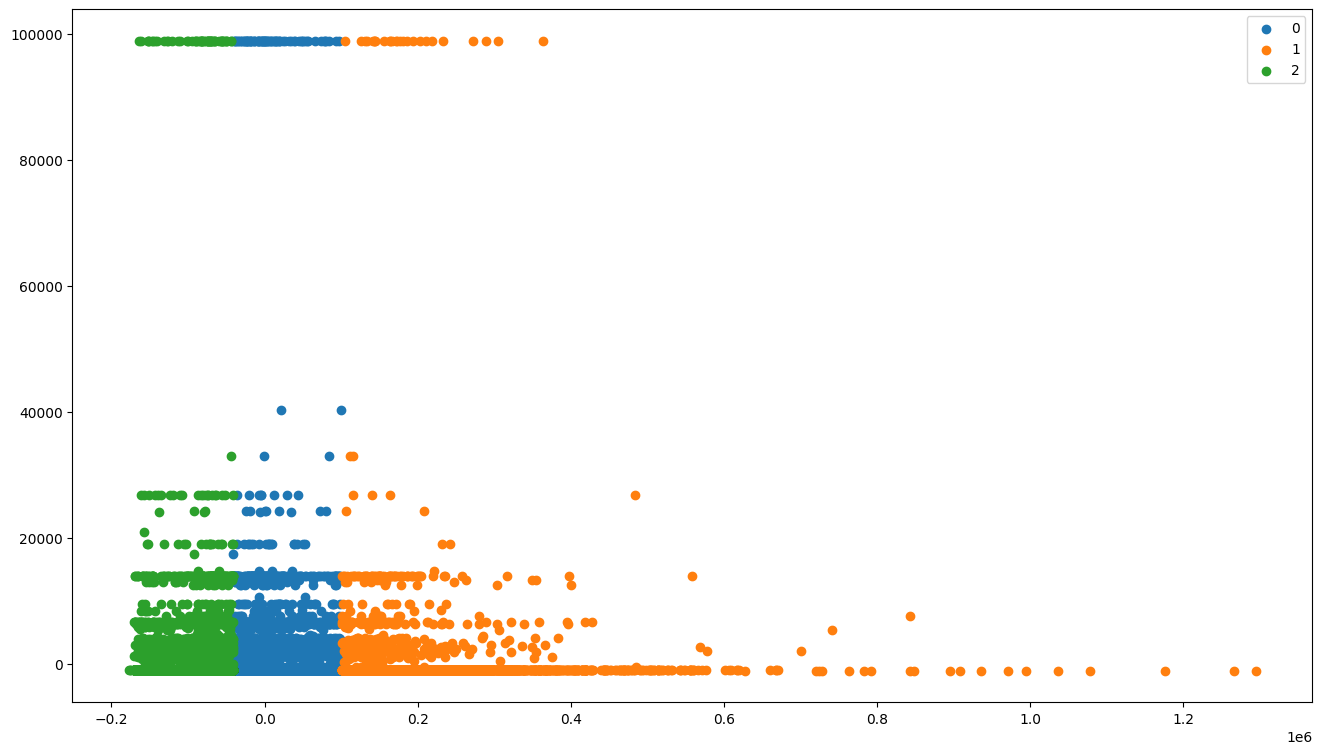

In [ ]:
labels = kmeans.labels_
u_labels = np.unique(labels)
fig = plt.gcf()
fig.set_size_inches(16, 9)

# for each label in u_labels
for i in u_labels:
    # print the values for this label on a scatter plot
    plt.scatter(df_2f[labels == i , 0] , df_2f[labels == i , 1] , label = i)
plt.legend()
plt.show()

**Discussion**

It is natural that the supervised machine learning algorithm performed better than the unsupervised one considering the fact we are currently working with labelled data. If it were the other way around, the unsupervised approach would have been the suitable one.

Regarding the supervised approach, we managed to reach an accuracy level of 88%, which is not the optimal accuracy percentage that we were hoping for. However, it should be noted that we did not try any techniques, such as Hyperparameter Tuning, to optimize the model further due to time and scope limitations. Additionally, the dataset is highly imbalanced which can explain why the accuray percentage is not really great.

In conclusion, this dataset should ideally be used to train a supervised classification model, not an unsupervised model. However, if the dataset itself has problems, no amount of preprocessing or training will allow us to develop a suitable and accurate model to apply to other datasets.